In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/population-and-gdp-africa/Data_Africa.csv")

In [3]:
df.head()

,ID,Year,Country,Continent,Population,GDP (USD)
0,1,2000,Uganda,East Africa,23303189,6.193247e+09
1,2,2001,Uganda,East Africa,24022603,5.840504e+09
2,3,2002,Uganda,East Africa,24781316,5.840504e+09
3,4,2003,Uganda,East Africa,25577246,6.606884e+09
4,5,2004,Uganda,East Africa,26403221,7.939488e+09


In [4]:
df.tail()

,ID,Year,Country,Continent,Population,GDP (USD)
1329,1330,2018,Togo,West Africa,7794569,7.029218e+09
1330,1331,2019,Togo,West Africa,7986521,6.992656e+09
1331,1332,2020,Togo,West Africa,8181085,7.389329e+09
1332,1333,2021,Togo,West Africa,8399356,8.334047e+09
1333,1334,2022,Togo,West Africa,8623451,8.126439e+09


In [5]:
df.shape

(1334, 6)

In [6]:
df.describe()

,ID,Year,Population,GDP (USD)
count,1334.00000,1334.000000,1.334000e+03,1.179000e+03
mean,667.50000,2011.000000,1.843945e+07,3.622274e+10
std,385.23694,6.635737,2.821587e+07,7.842724e+10
min,1.00000,2000.000000,5.144000e+03,7.595113e+07
25%,334.25000,2005.000000,1.868256e+06,2.934893e+09
50%,667.50000,2011.000000,9.688700e+06,1.022490e+10
75%,1000.75000,2017.000000,2.183554e+07,2.710397e+10
max,1334.00000,2022.000000,2.145687e+08,5.741838e+11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1334 non-null   int64  
 1   Year         1334 non-null   int64  
 2   Country      1334 non-null   object 
 3   Continent    1334 non-null   object 
 4   Population   1334 non-null   int64  
 5   GDP (USD)    1179 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 62.7+ KB


In [8]:
df.isnull().sum()

ID               0
Year             0
Country          0
Continent        0
Population       0
GDP (USD)      155
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

ID             0
Year           0
Country        0
Continent      0
Population     0
GDP (USD)      0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.rename(columns={'Country': 'country', 'Continent': 'continent', 'Year': 'year'},inplace=True)

In [13]:
df.head()

,ID,year,country,continent,Population,GDP (USD)
0,1,2000,Uganda,East Africa,23303189,6.193247e+09
1,2,2001,Uganda,East Africa,24022603,5.840504e+09
2,3,2002,Uganda,East Africa,24781316,5.840504e+09
3,4,2003,Uganda,East Africa,25577246,6.606884e+09
4,5,2004,Uganda,East Africa,26403221,7.939488e+09


In [14]:
# Correct DataFrame access
df.iloc[0, 4]

23303189

# 1. GDP Analysis

In [15]:
df['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

# a) Highest GDP value, Country , year, 

In [16]:
highest_GDP_country = df[['country', 'year', 'GDP (USD)']].sort_values(by='GDP (USD)', ascending=False).head(2)
highest_GDP_country 

,country,year,GDP (USD)
1233,Nigeria,2014,5.741838e+11
1232,Nigeria,2013,5.201172e+11


In [17]:
highest_GDP_count = df.loc[df['GDP (USD)'].idxmax()]['GDP (USD)']
print(f'Highest GDP Value : {highest_GDP_count}')

Highest GDP Value : 574183825592.36


In [18]:
highest_GDP_country = df.loc[df['GDP (USD)'].idxmax()]['country']
print(f'Country with the highest GDP : {highest_GDP_country}')

Country with the highest GDP : Nigeria


In [19]:
highest_GDP_year = df.loc[df['GDP (USD)'].idxmax()]['year']
print(f'Highest GDP Year : {highest_GDP_year}')

Highest GDP Year : 2014


# b) Lowest GDP value, Country, year

In [20]:
lowest_GDP_country = df[['country', 'year', 'GDP (USD)']].sort_values(by='GDP (USD)', ascending=True).head(2)
lowest_GDP_country 

,country,year,GDP (USD)
852,Sao Tome and Principe,2001,75951131.95
853,Sao Tome and Principe,2002,85171073.88


In [21]:
lowest_GDP_count = df.loc[df['GDP (USD)'].idxmin()]['GDP (USD)']
print(f'Lowest GDP value : {lowest_GDP_count}')

Lowest GDP value : 75951131.95


In [22]:
lowest_GDP_country = df.loc[df['GDP (USD)'].idxmin()]['country']
print(f'Country with the lowest GDP : {lowest_GDP_country}')

Country with the lowest GDP : Sao Tome and Principe


In [23]:
lowest_GDP_year = df.loc[df['GDP (USD)'].idxmin()]['year']
print(f'Lowest GDP Year : {lowest_GDP_year}')

Lowest GDP Year : 2001


# c) . Uganda GDP analysis from 2000 to 2022 years

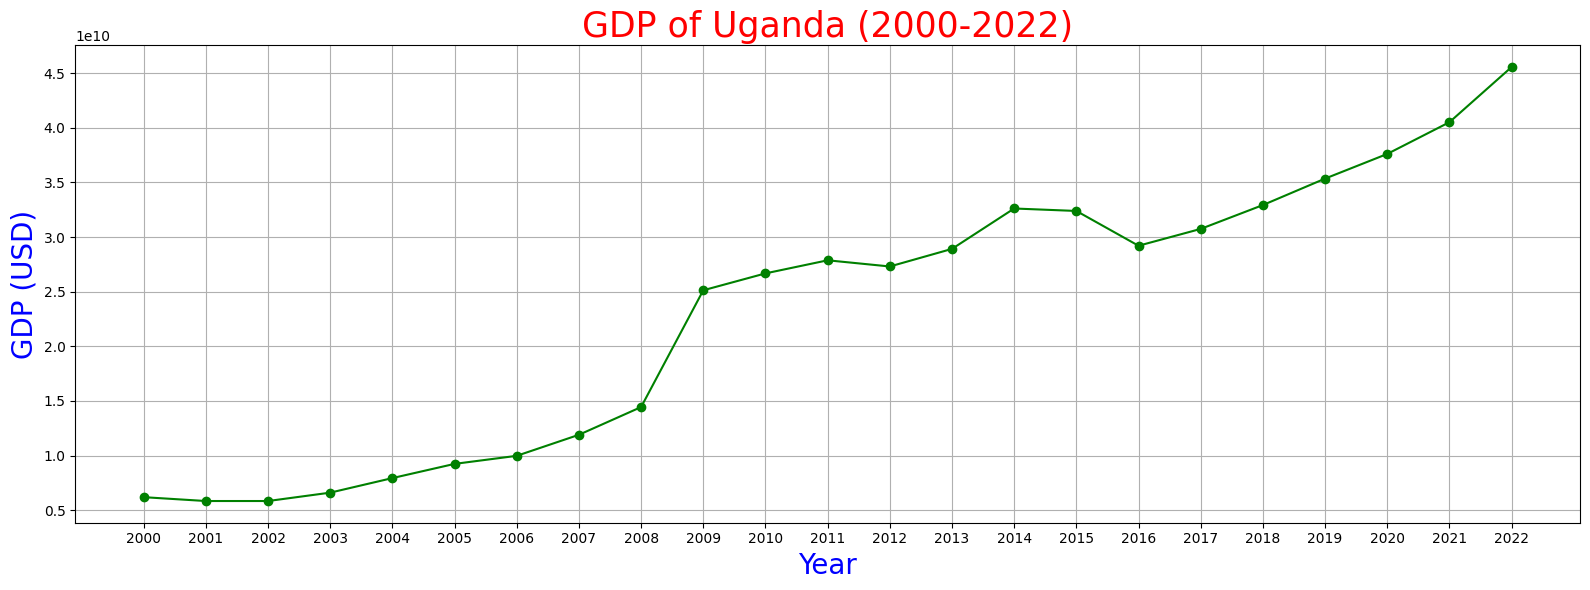

In [24]:
# 1. Filter rows for 'Uganda'
uganda_df = df[df['country'] == 'Uganda']

# 2. Filter rows for years from 2000 to 2022
years = range(2000, 2023)
uganda_df = uganda_df[uganda_df['year'].isin(years)]

# 3. Create a line plot for GDP over the years
plt.figure(figsize=(16, 6))
plt.plot(uganda_df['year'].values, uganda_df['GDP (USD)'].values, marker='o', linestyle='-', color='green')
plt.title('GDP of Uganda (2000-2022)', color='red', size=25)
plt.xlabel('Year', color='blue', size=20)
plt.ylabel('GDP (USD)', color='blue', size=20)
plt.grid(True)
plt.xticks(years, rotation=0)
plt.tight_layout()
plt.show()


# d) . South Africa GDP Analysis from 2000 to 2022 years 

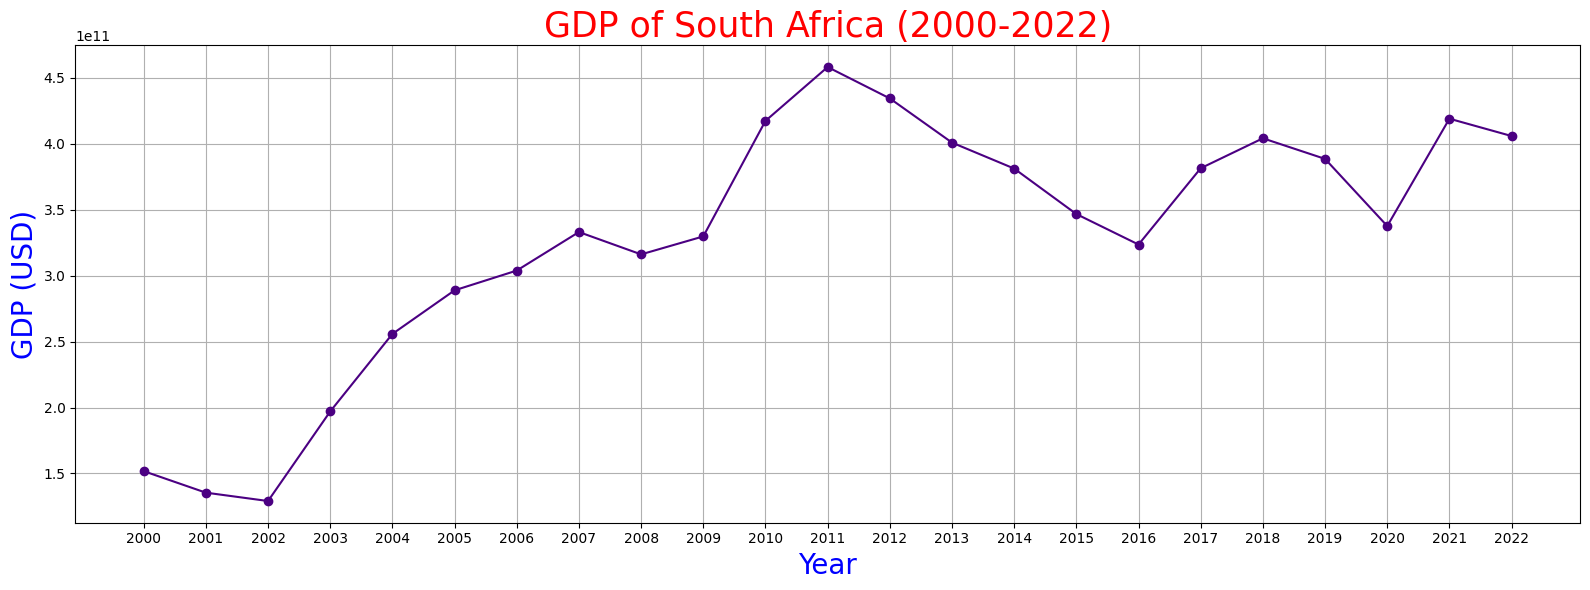

In [25]:
# 1. Filter rows for 'South Africa'
South_Africa_df = df[df['country'] == 'South Africa']

# 2. Filter rows for years from 2000 to 2022
years = range(2000, 2023)
South_Africa_df = South_Africa_df[South_Africa_df['year'].isin(years)]

# 3. Create a line plot for GDP over the years
plt.figure(figsize=(16, 6))
plt.plot(South_Africa_df['year'].values, South_Africa_df['GDP (USD)'].values, marker='o', linestyle='-', color='indigo')
plt.title('GDP of South Africa (2000-2022)', color='red', size=25)
plt.xlabel('Year', color='blue', size=20)
plt.ylabel('GDP (USD)', color='blue', size=20)
plt.grid(True)
plt.xticks(years, rotation=0)
plt.tight_layout()
plt.show()

# e) . Morocco GDP Analysis from 2000 to 2022 years

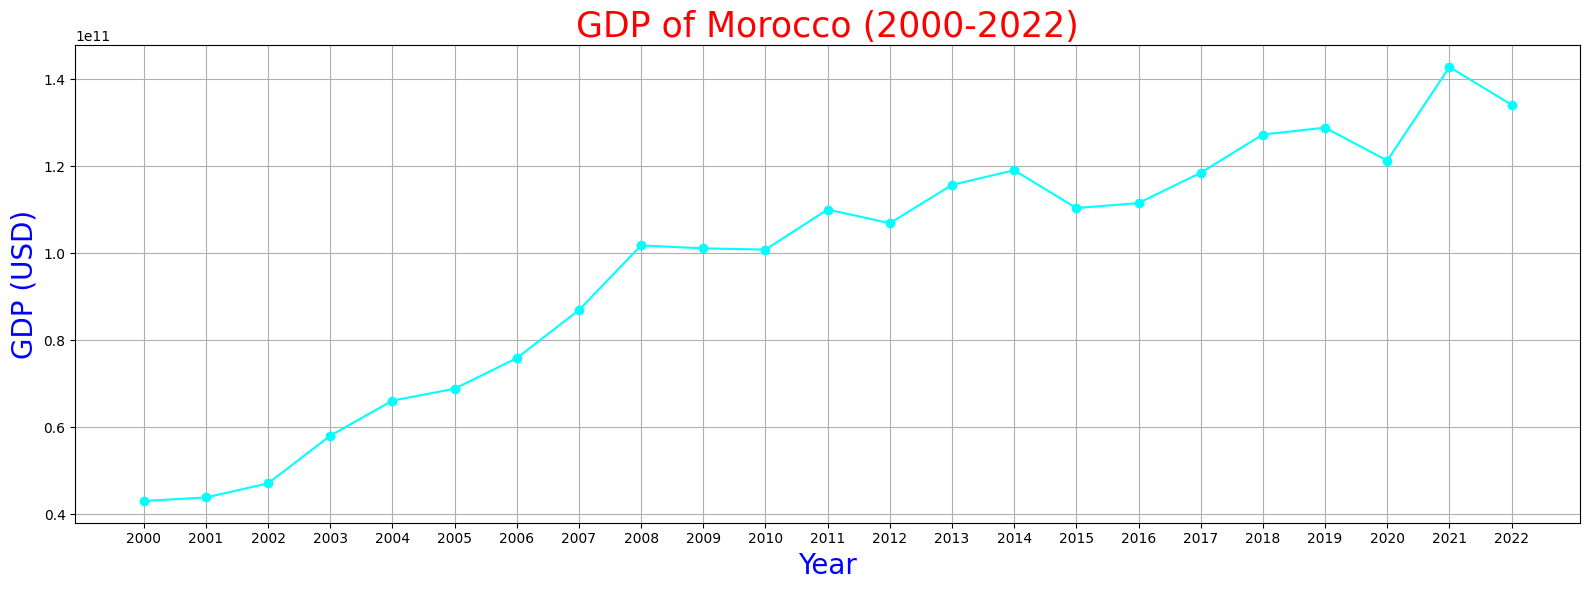

In [26]:
# 1. Filter rows for 'Morocco'
Morocco_df = df[df['country'] == 'Morocco']

# 2. Filter rows for years from 2000 to 2021
years = range(2000, 2023)
Morocco_df = Morocco_df[Morocco_df['year'].isin(years)]

# 3. Create a line plot for GDP over the years
plt.figure(figsize=(16, 6))
plt.plot(Morocco_df['year'].values, Morocco_df['GDP (USD)'].values, marker='o', linestyle='-', color='cyan')
plt.title('GDP of Morocco (2000-2022)', color='red', size=25)
plt.xlabel('Year', color='blue', size=20)
plt.ylabel('GDP (USD)', color='blue', size=20)
plt.grid(True)
plt.xticks(years, rotation=0)
plt.tight_layout()
plt.show()

# f) . Madagascar GDP Analysis from 2000 to 2022 years

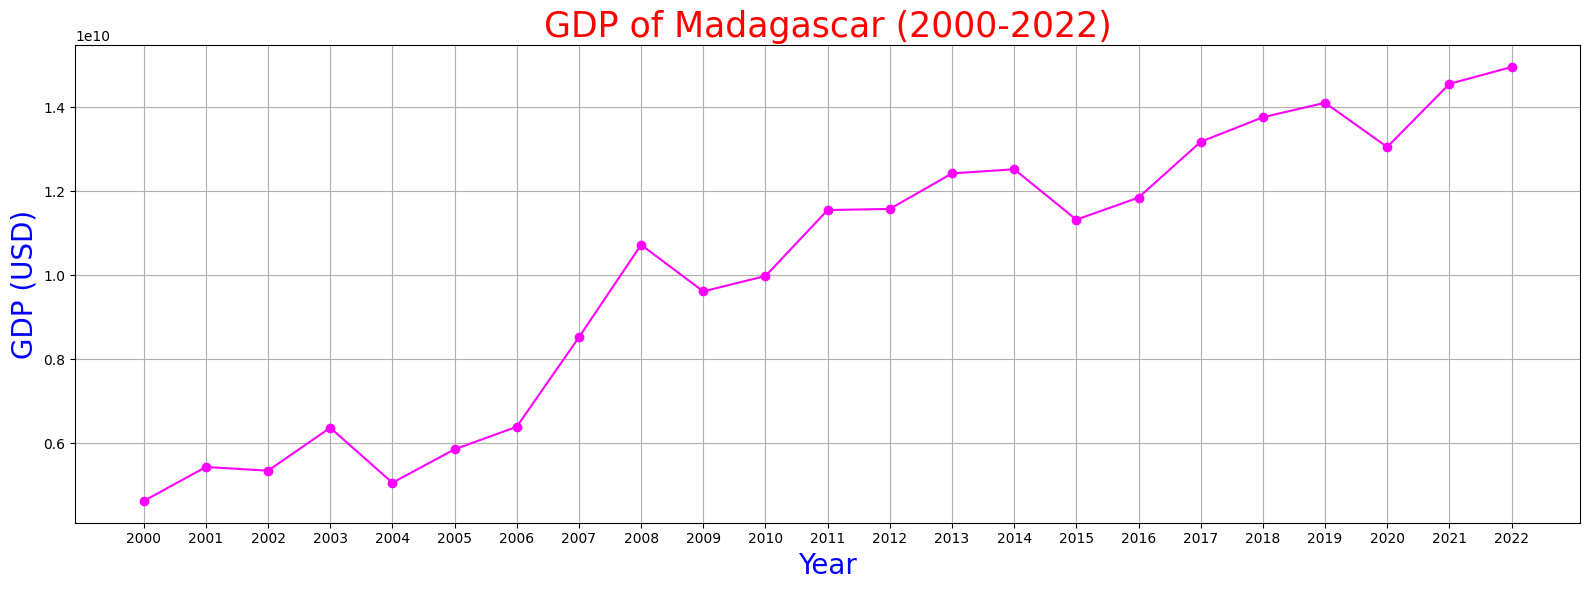

In [27]:
# 1. Filter rows for 'Madagascar'
Madagascar_df = df[df['country'] == 'Madagascar']

# 2. Filter rows for years from 2000 to 2021
years = range(2000, 2023)
Madagascar_df = Madagascar_df[Madagascar_df['year'].isin(years)]

# 3. Create a line plot for GDP over the years
plt.figure(figsize=(16, 6))
plt.plot(Madagascar_df['year'].values, Madagascar_df['GDP (USD)'].values, marker='o', linestyle='-', color='magenta')
plt.title('GDP of Madagascar (2000-2022)', color='red', size=25)
plt.xlabel('Year', color='blue', size=20)
plt.ylabel('GDP (USD)', color='blue', size=20)
plt.grid(True)
plt.xticks(years, rotation=0)
plt.tight_layout()
plt.show()

# g) . Sorting the Countries by GDP(USD) in descending order with the help of barplot

Text(0.5, 1.0, 'GDP (USD) data for each Country')

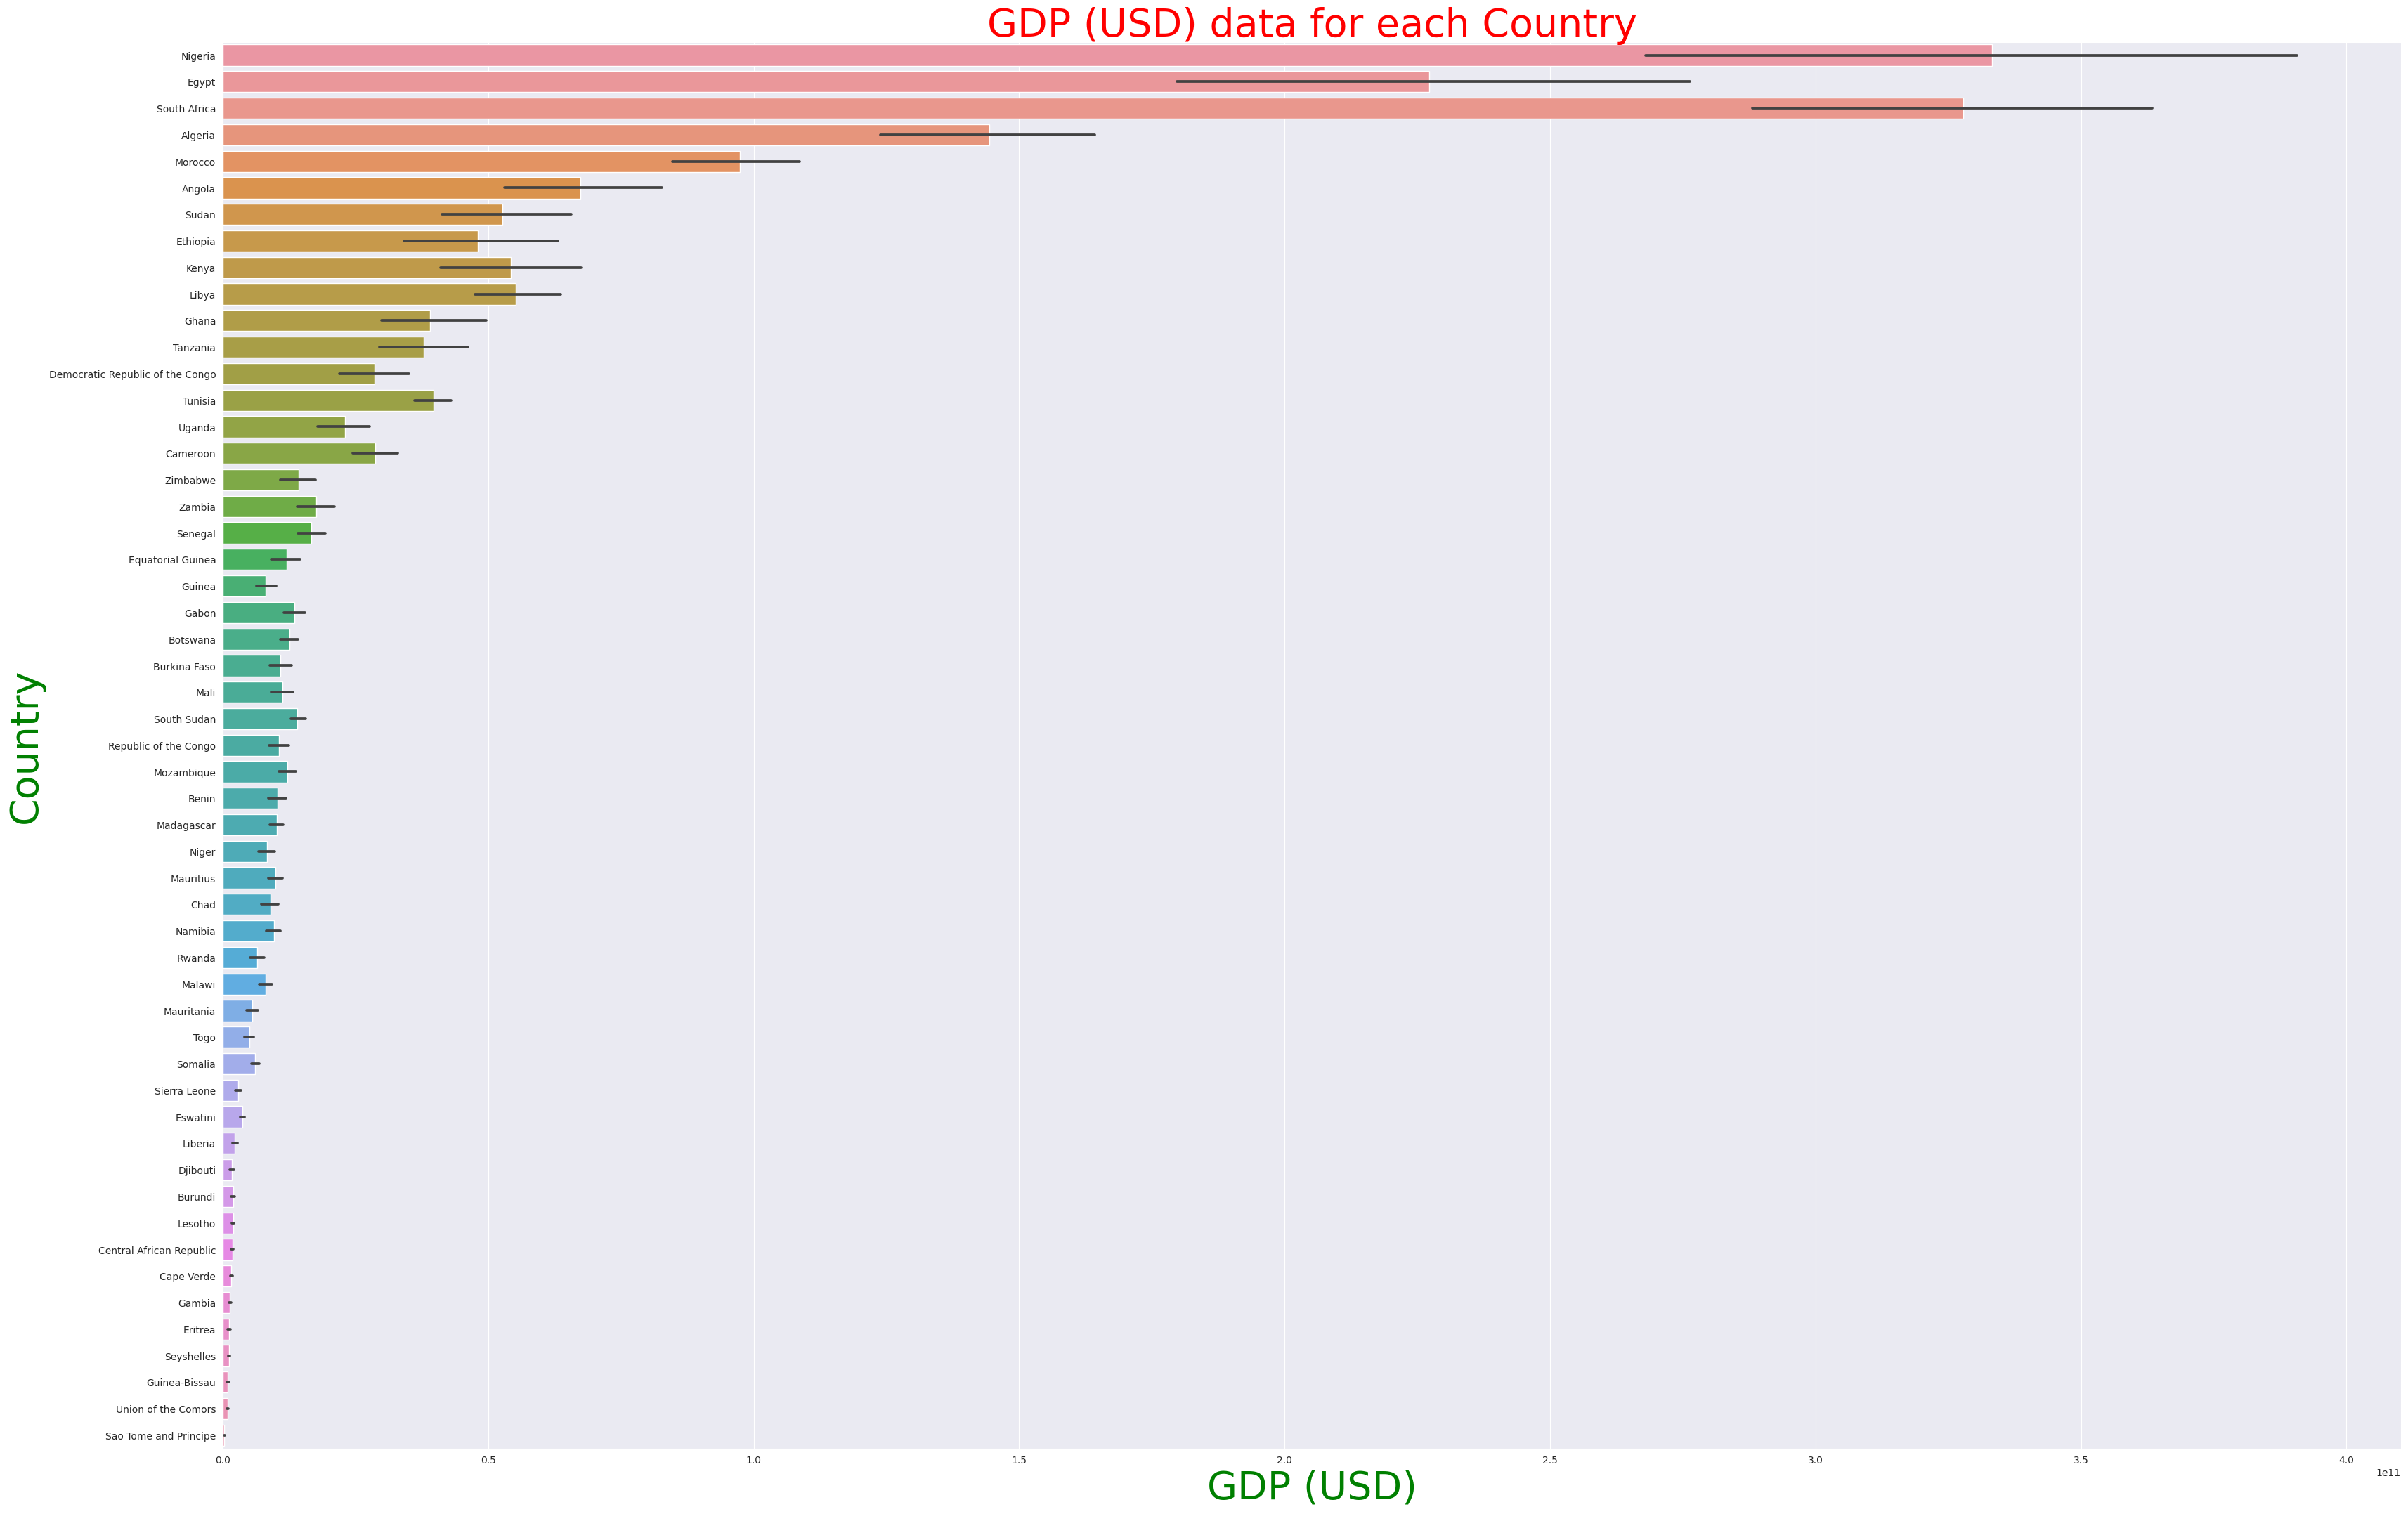

In [28]:
# Create a bar graph
sns.set_style('darkgrid')
plt.figure(figsize=(40,26))
sns.barplot(y='country', x='GDP (USD)', data=df.sort_values(by='GDP (USD)', ascending=False))
plt.xlabel('GDP (USD)', color='green', size=40)
plt.ylabel('Country', color='green', size=40)
plt.title('GDP (USD) data for each Country', color='red',size=40)

# 2. Population Analysis

In [29]:
df['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

# a) Highest Population Country, Value, Year 

In [30]:
highest_population_country = df[['country', 'Population ', 'year']].sort_values(by='Population ', ascending=False).head(2)
highest_population_country

,country,Population,year
1241,Nigeria,214568727,2022
1240,Nigeria,208994835,2021


In [31]:
highest_population_country = df.loc[df['Population '].idxmax()]['country']
print(f'Country with the highest population : {highest_population_country}')

Country with the highest population : Nigeria


In [32]:
highest_population_count = df.loc[df['Population '].idxmax()]['Population ']
print(f'Highest population Count : {highest_population_count}')

Highest population Count : 214568727


In [33]:
highest_population_year = df.loc[df['Population '].idxmax()]['year']
print(f'Highest population Year : {highest_population_year}')

Highest population Year : 2022


# b) Lowest Population Country, Value, Year

In [34]:
lowest_population_country = df[['country', 'Population ', 'year']].sort_values(by='Population ', ascending=True).head(2)
lowest_population_country

,country,Population,year
322,Seyshelles,80454,2000
323,Seyshelles,81711,2001


In [35]:
lowest_population_country = df.loc[df['Population '].idxmin()]['country']
print(f'Country with the lowest population : {lowest_population_country}')

Country with the lowest population : Seyshelles


In [36]:
lowest_population_count = df.loc[df['Population '].idxmin()]['Population ']
print(f'Lowest Population Count : {lowest_population_count}')

Lowest Population Count : 80454


In [37]:
lowest_population_year = df.loc[df['Population '].idxmin()]['year']
print(f'Lowest population Year : {lowest_population_year}')

Lowest population Year : 2000


# c) . Nigeria population analysis from 2000 to 2022 years 

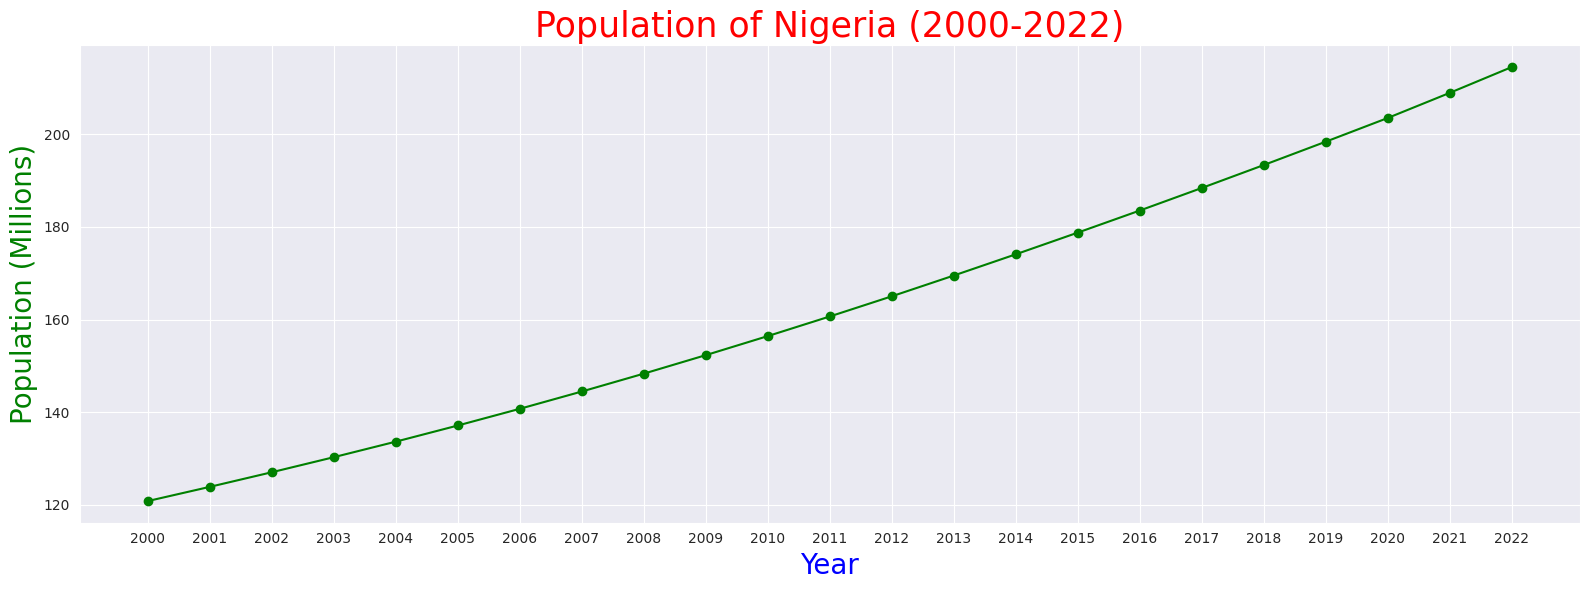

In [38]:
# Filter rows for 'Nigeria'
Nigeria_df = df[df['country'] == 'Nigeria']

# Filter rows for years from 2000 to 2021
years = range(2000, 2023)
Nigeria_df = Nigeria_df[Nigeria_df['year'].isin(years)]

# Convert Population to millions
x = Nigeria_df['Population ']/1000000     # Divide by 1,000,000

# Create a line plot for Population over the years
plt.figure(figsize=(16, 6))
plt.plot(Nigeria_df['year'].values, x.values, marker='o', linestyle='-', color='green')
plt.title('Population of Nigeria (2000-2022)', color='red', size=25)
plt.xlabel('Year', color='blue', size=20)
plt.ylabel('Population (Millions)', color='green', size=20)
plt.grid(True)
plt.xticks(years, rotation=0)
plt.tight_layout()
plt.show()


# d) . Egypt population analysis from 2000 to 2022 years

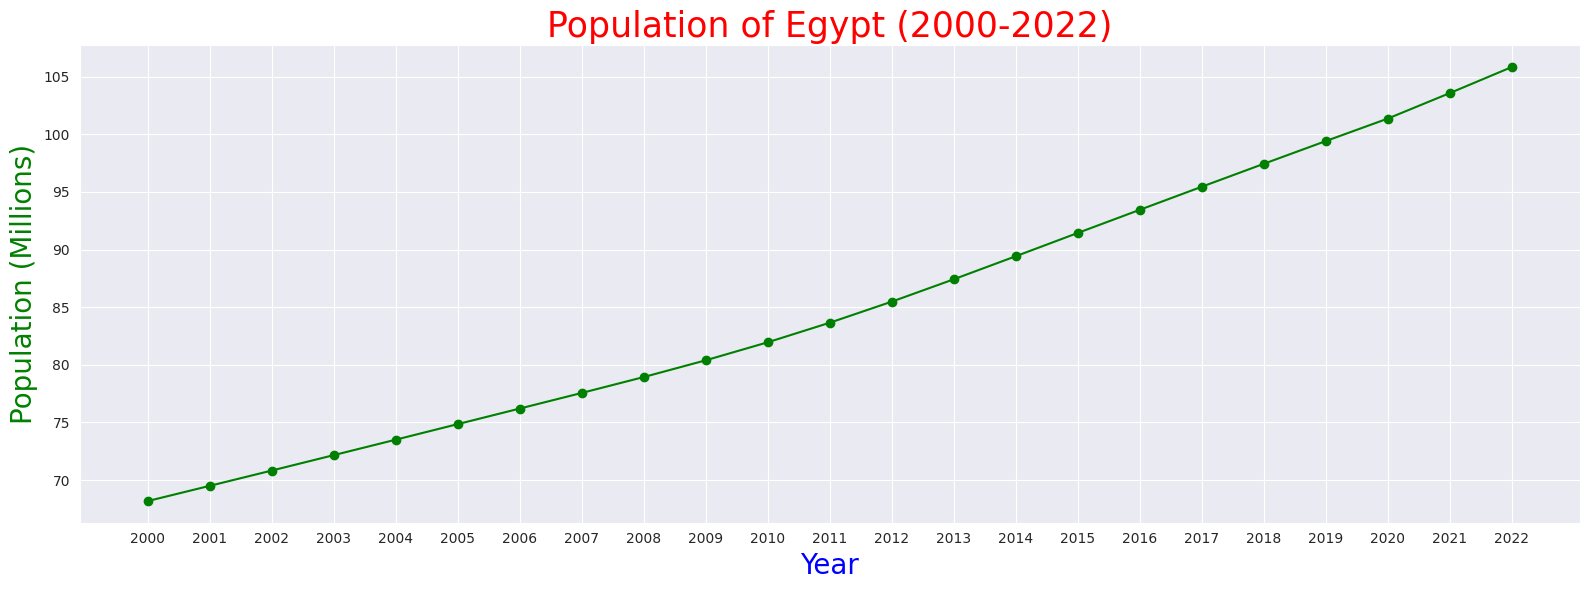

In [39]:
# Filter rows for 'Nigeria'
Egypt_df = df[df['country'] == 'Egypt']

# Filter rows for years from 2000 to 2021
years = range(2000, 2023)
Egypt_df = Egypt_df[Egypt_df['year'].isin(years)]

# Convert Population to millions
x = Egypt_df['Population ']/1000000     # Divide by 1,000,000

# Create a line plot for Population over the years
plt.figure(figsize=(16, 6))
plt.plot(Nigeria_df['year'].values, x.values, marker='o', linestyle='-', color='green')
plt.title('Population of Egypt (2000-2022)', color='red', size=25)
plt.xlabel('Year', color='blue', size=20)
plt.ylabel('Population (Millions)', color='green', size=20)
plt.grid(True)
plt.xticks(years, rotation=0)
plt.tight_layout()
plt.show()

# e) . South Africa Population analysis from 2000 to 2022 years

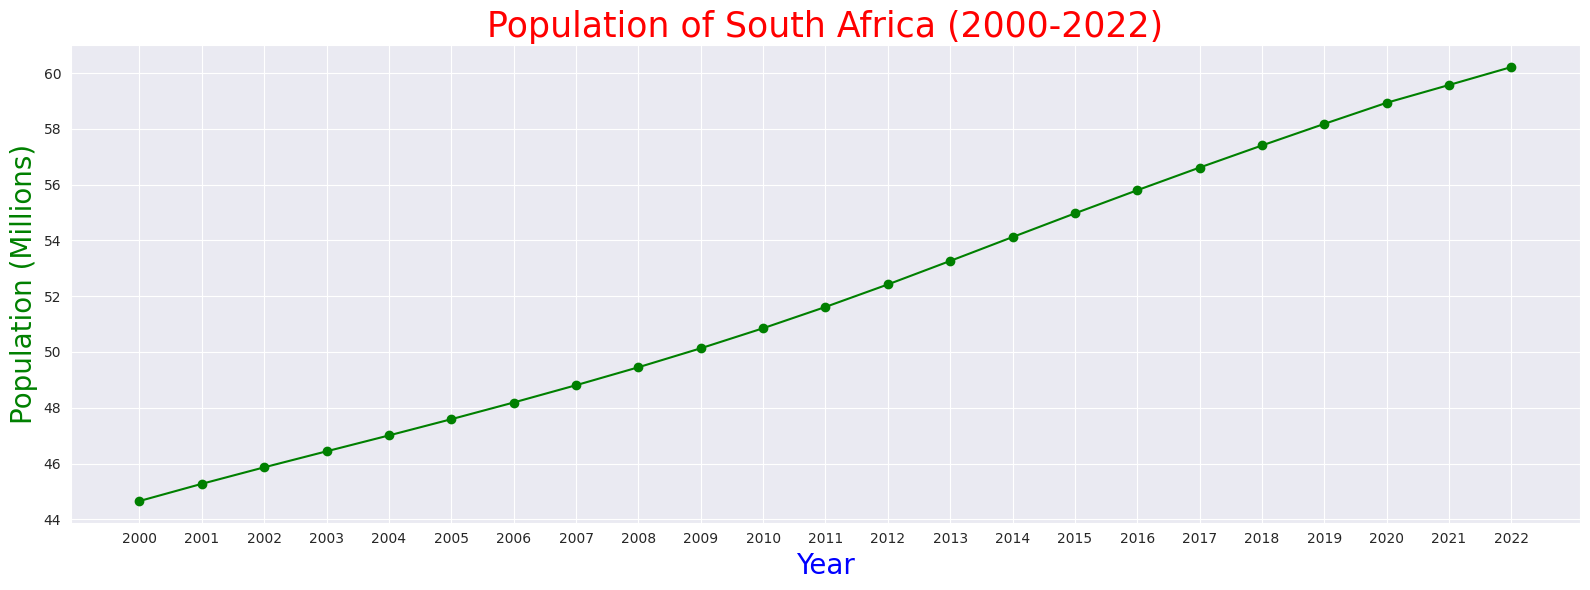

In [40]:
# Filter rows for 'Nigeria'
South_Africa_df = df[df['country'] == 'South Africa']

# Filter rows for years from 2000 to 2021
years = range(2000, 2023)
South_Africa_df = South_Africa_df[South_Africa_df['year'].isin(years)]

# Convert Population to millions
x = South_Africa_df['Population ']/1000000     # Divide by 1,000,000

# Create a line plot for Population over the years
plt.figure(figsize=(16, 6))
plt.plot(Nigeria_df['year'].values, x.values, marker='o', linestyle='-', color='green')
plt.title('Population of South Africa (2000-2022)', color='red', size=25)
plt.xlabel('Year', color='blue', size=20)
plt.ylabel('Population (Millions)', color='green', size=20)
plt.grid(True)
plt.xticks(years, rotation=0)
plt.tight_layout()
plt.show()

# f) . Tanzania Population analysis from 2000 to 2022 years

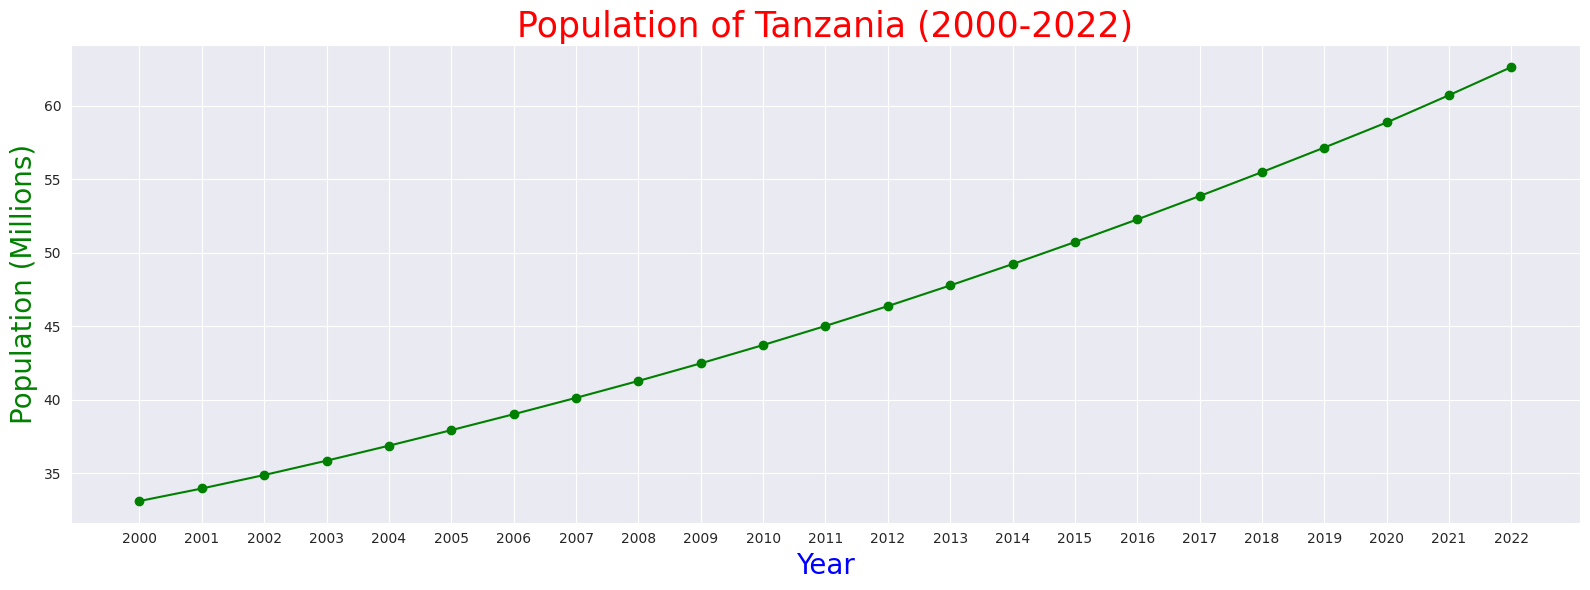

In [41]:
# Filter rows for 'Nigeria'
Tanzania_df = df[df['country'] == 'Tanzania']

# Filter rows for years from 2000 to 2021
years = range(2000, 2023)
Tanzania_df = Tanzania_df[Tanzania_df['year'].isin(years)]

# Convert Population to millions
x = Tanzania_df['Population ']/1000000     # Divide by 1,000,000

# Create a line plot for Population over the years
plt.figure(figsize=(16, 6))
plt.plot(Nigeria_df['year'].values, x.values, marker='o', linestyle='-', color='green')
plt.title('Population of Tanzania (2000-2022)', color='red', size=25)
plt.xlabel('Year', color='blue', size=20)
plt.ylabel('Population (Millions)', color='green', size=20)
plt.grid(True)
plt.xticks(years, rotation=0)
plt.tight_layout()
plt.show()

# g). Sorting the Countries by Population in descending order with the help of barplot

Text(0.5, 1.0, 'Population data for each Country')

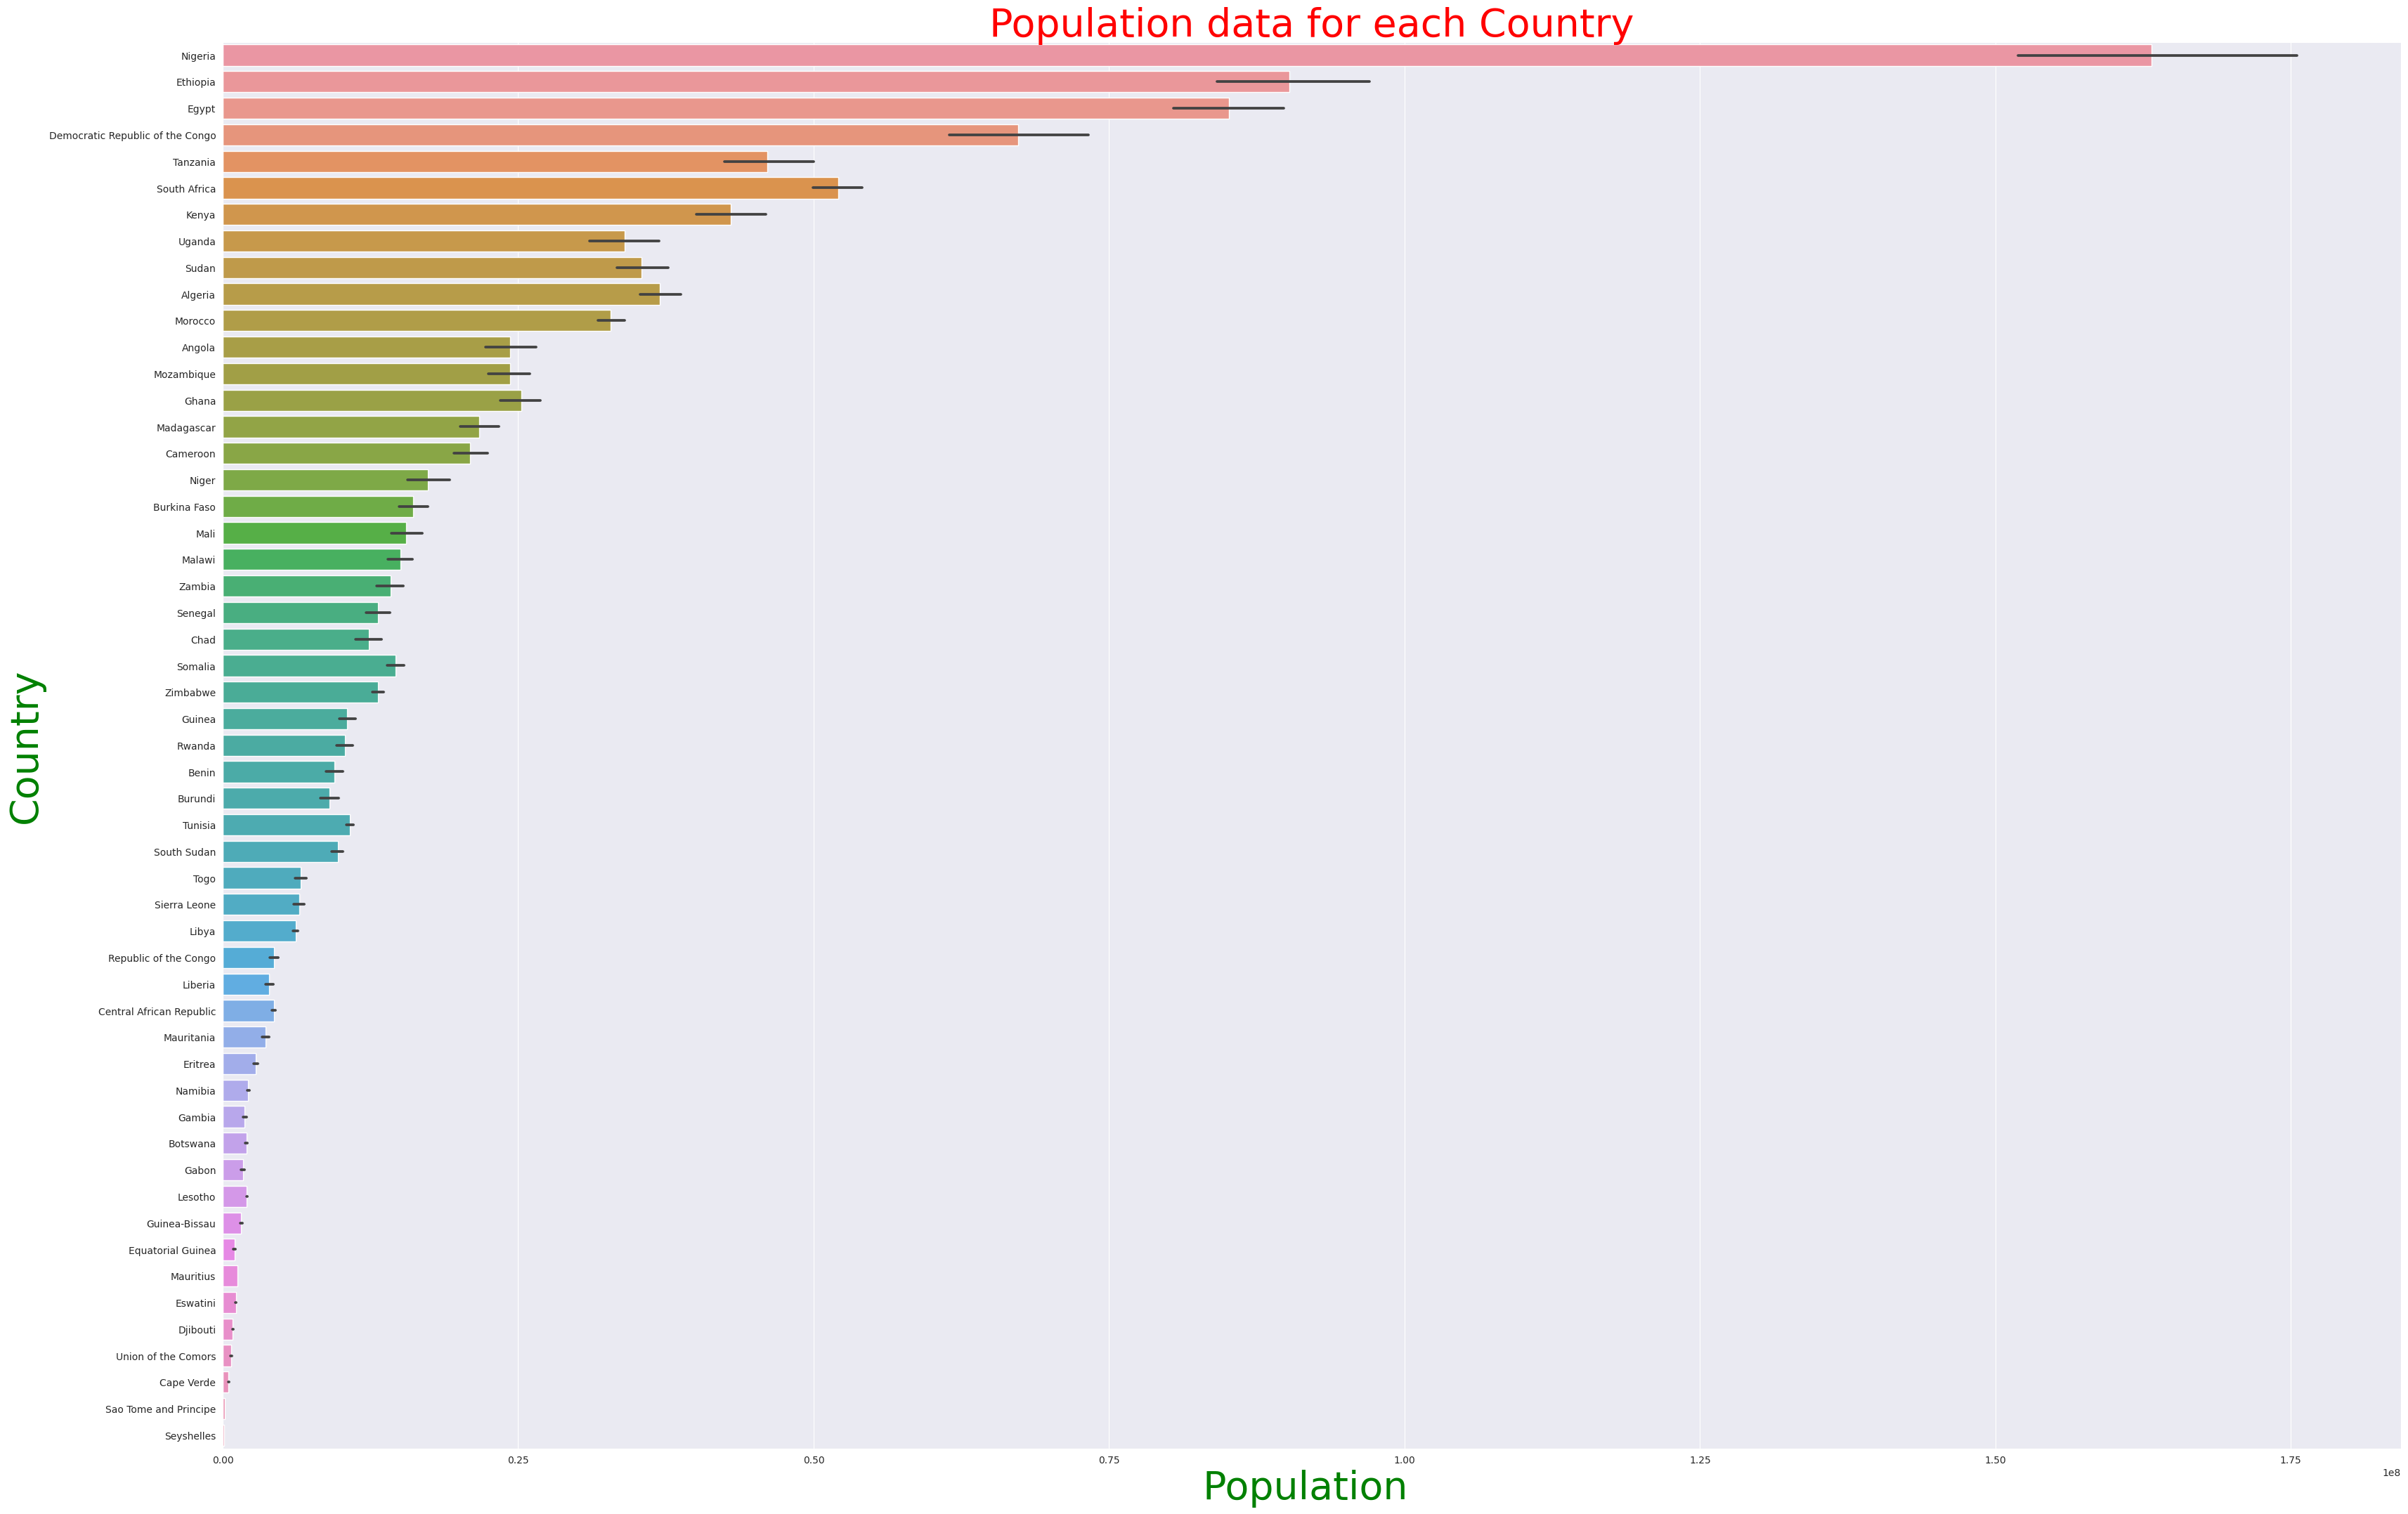

In [42]:
# Create a bar graph
sns.set_style('darkgrid')
plt.figure(figsize=(40,26))
sns.barplot(y='country', x='Population ', data=df.sort_values(by='Population ', ascending=False))
plt.xlabel('Population ', color='green', size=40)
plt.ylabel('Country', color='green', size=40)
plt.title('Population data for each Country', color='red',size=40)

# 3. Afirican continent Analysis

In [43]:
# Get unique continent
df['continent'].unique()

array(['East Africa', 'North Africa', 'South Africa', 'Central Africa',
       'West Africa'], dtype=object)

In [44]:
# No. of times continent repeated in dataset
df['continent'].value_counts()

continent
East Africa       375
West Africa       345
Central Africa    206
North Africa      138
South Africa      115
Name: count, dtype: int64

In [45]:
# Get all unique countries exist in dataset
df['country'].unique()

array(['Uganda', 'Burundi', 'Djibouti', 'Zambia', 'Zimbabwe', 'Kenya',
       'Union of the Comors', 'Mauritius', 'Madagascar', 'Malawi',
       'Mozambique', 'Rwanda', 'Seyshelles', 'Somalia', 'Tanzania',
       'Eritrea', 'Ethiopia', 'South Sudan', 'Sudan', 'Algeria', 'Egypt',
       'Libya', 'Morocco', 'Tunisia', 'Botswana', 'Lesotho', 'Namibia',
       'Eswatini', 'South Africa', 'Angola', 'Gabon', 'Cameroon',
       'Democratic Republic of the Congo', 'Republic of the Congo',
       'Sao Tome and Principe', 'Central African Republic', 'Chad',
       'Equatorial Guinea', 'Benin', 'Burkina Faso', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Cape Verde', 'Liberia', 'Mauritania',
       'Mali', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo'],
      dtype=object)

# Get unique countries from each African continent

In [46]:
# Group by 'Continent' and get unique countries
grouped_continent = df.groupby('continent')
unique_countries_by_continent = grouped_continent['country'].unique()

# Print the result
for continent, unique_countries in unique_countries_by_continent.items():
    print(f'Continent: {continent}')
    print('countries :')
    for country in unique_countries:
        print(country)
    print()    

Continent: Central Africa
countries :
Angola
Gabon
Cameroon
Democratic Republic of the Congo
Republic of the Congo
Sao Tome and Principe
Central African Republic
Chad
Equatorial Guinea

Continent: East Africa
countries :
Uganda
Burundi
Djibouti
Zambia
Zimbabwe
Kenya
Union of the Comors
Mauritius
Madagascar
Malawi
Mozambique
Rwanda
Seyshelles
Somalia
Tanzania
Eritrea
Ethiopia
South Sudan

Continent: North Africa
countries :
Sudan
Algeria
Egypt
Libya
Morocco
Tunisia

Continent: South Africa
countries :
Botswana
Lesotho
Namibia
Eswatini
South Africa

Continent: West Africa
countries :
Benin
Burkina Faso
Gambia
Ghana
Guinea
Guinea-Bissau
Cape Verde
Liberia
Mauritania
Mali
Niger
Nigeria
Senegal
Sierra Leone
Togo



# No. of country from each African continent

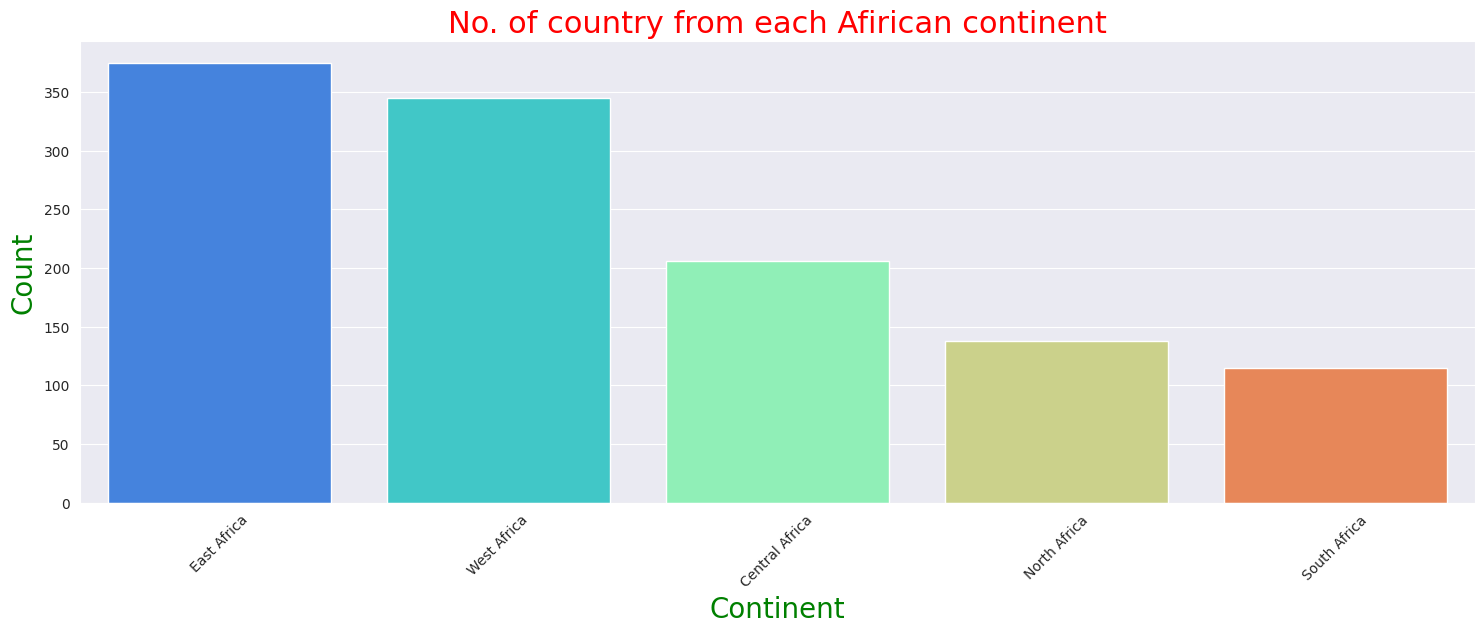

In [47]:
country_distribution_by_African_continent = df['continent'].value_counts() 
plt.figure(figsize=(18,6))
sns.barplot(x=country_distribution_by_African_continent.index, y=country_distribution_by_African_continent.values, palette='rainbow')
plt.ylabel('Count', color='green', size=20)
plt.xlabel('Continent', color='green', size=20)
plt.title('No. of country from each Afirican continent', color='red', size=22)
plt.xticks(rotation=45)  # Rotate the channel types for better readability

plt.show()

# Distribution of country by African Continent

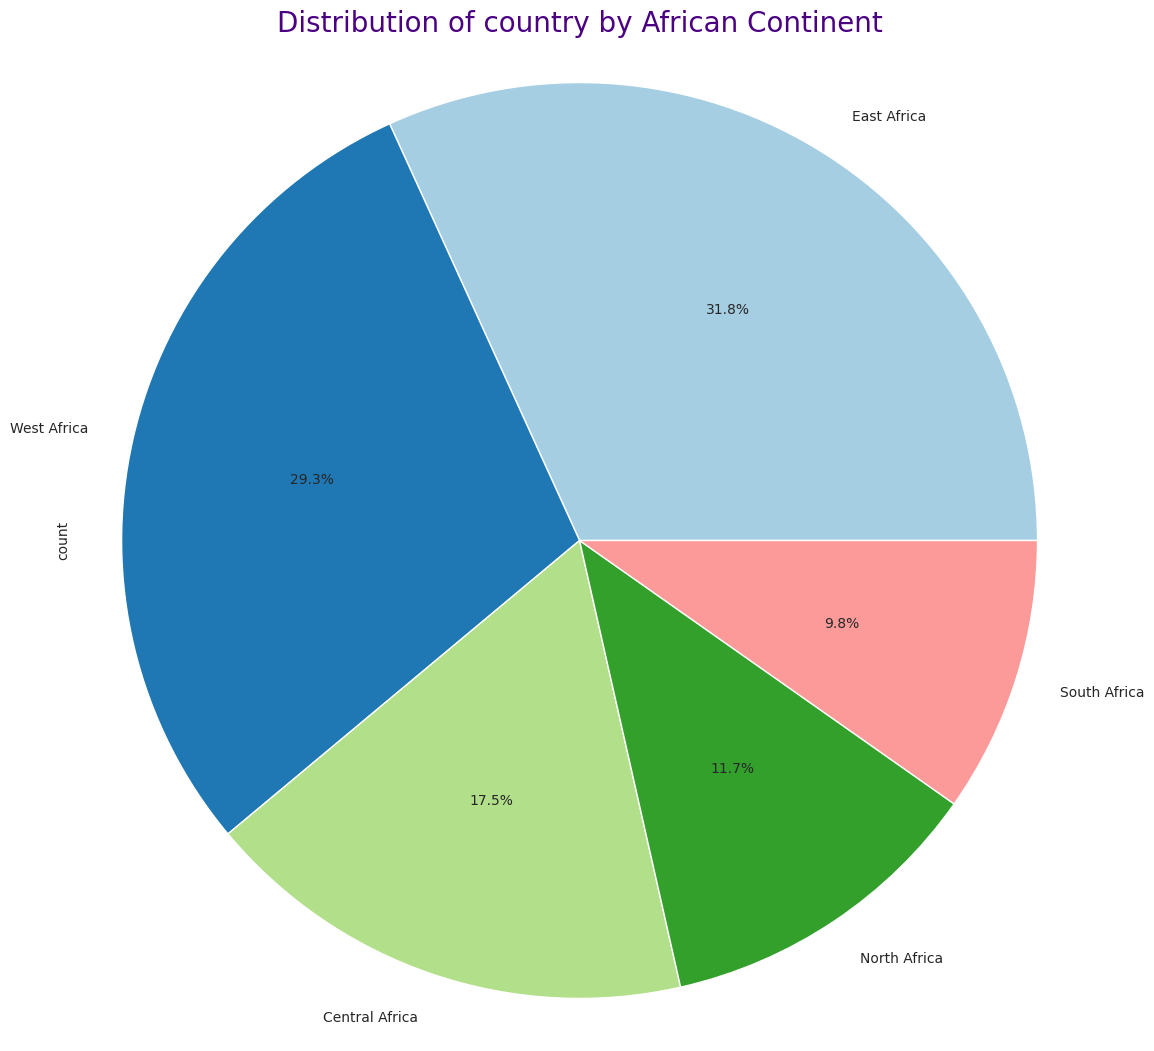

In [48]:
country_distribution_by_African_continent = df['continent'].value_counts()
plt.figure(figsize=(13,13))
country_distribution_by_African_continent.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=plt.cm.Paired.colors)

# Create a pie chart
plt.title('Distribution of country by African Continent',color='indigo',size=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()